<a href="https://colab.research.google.com/github/SantoshMahara/Logistics_Regression-Implementation/blob/main/LogisticRegressionHandson(20thFeb_21stFeb).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Regression Handson

**Steps for performing Handson**

1. importing libraries
2. importing dataset
3. EDA (Exploratory Data Analysis):

a) checking missing values

b) checking outliers

c) checking duplicate values

d) handling the above

4. Encoding
5. Feature Selection
6. Model building (training)
7. Make predictions
8. Evaluate model

In [ ]:
#confusion matrix:(TP,FP,TN,FN)
#accuracy: correctly classified data out of total  (TP+TN/ TP+TN+FP+FN)
#precision: actual true predictions out of total positive prediction (TP / TP+FP)
#recall/ sensitvity: true predictions out of total actual positive prediction (TP/ TP+FN)

**importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

**importing dataset**

In [ ]:
df = pd.read_csv('/content/bank-additional-full.csv', sep=';')

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.shape

(41199, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [ ]:
df.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
# unique() : give the unique values present in column
# nunique(): give number of unique values in column
# value_counts() : frequency of each unique value in column

In [ ]:
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown', nan], dtype=object)

In [ ]:
df['marital'].nunique()

4

In [ ]:
df['marital'].value_counts()

married     24934
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

EDA (Exploratory Data Analysis):
a) checking missing values

b) checking outliers

c) checking duplicate values

d) handling the above

In [ ]:
#missing values:

df.isna().sum() #count of null in each column

age               4
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
y                 3
dtype: int64

In [ ]:
nullcount= df.isnull().sum().sum()
nullcount

76

In [ ]:
#handling null
df.dropna(inplace=True)
# df=df.dropna()

In [ ]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
nullcount= df.isnull().sum().sum()
nullcount

0

In [ ]:
#duplicates

df.duplicated().sum()

13

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(41177, 21)

In [ ]:
#check outliers: using Boxplot

In [ ]:
col = list(df.columns)
col

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

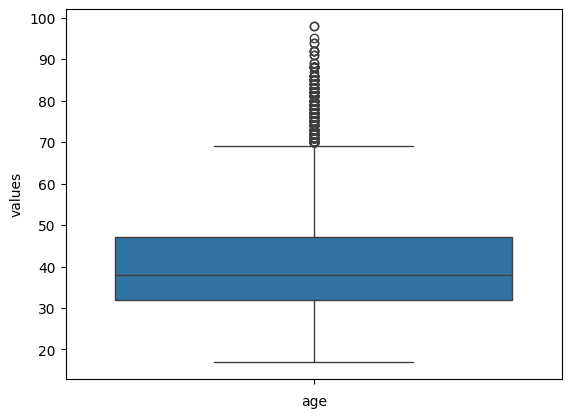

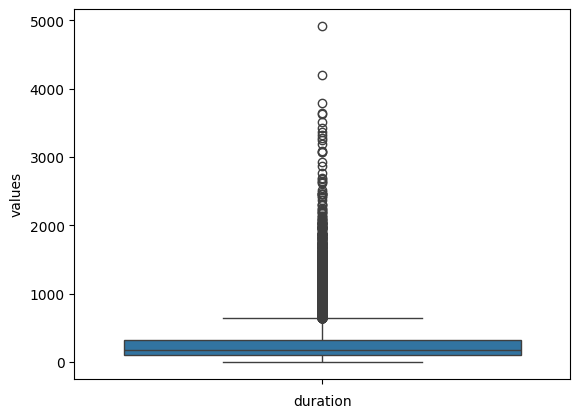

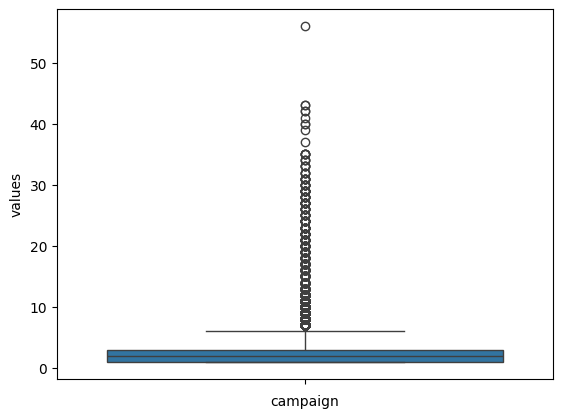

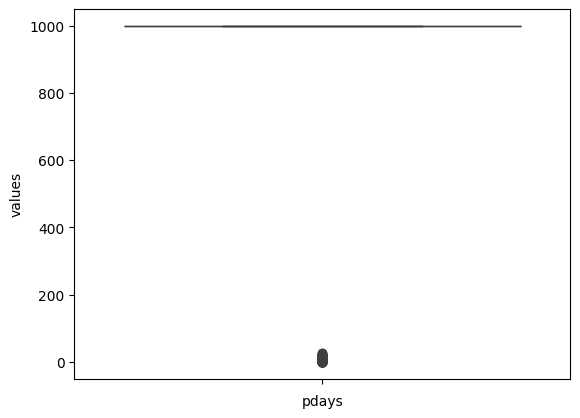

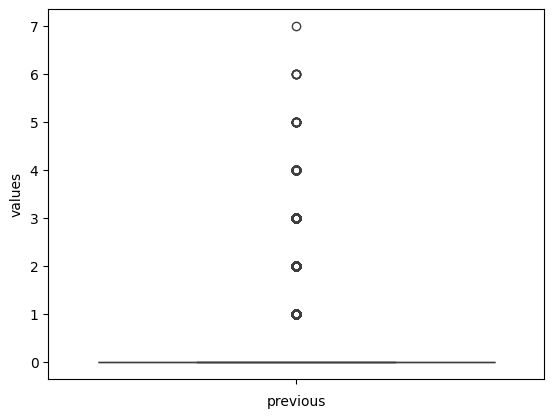

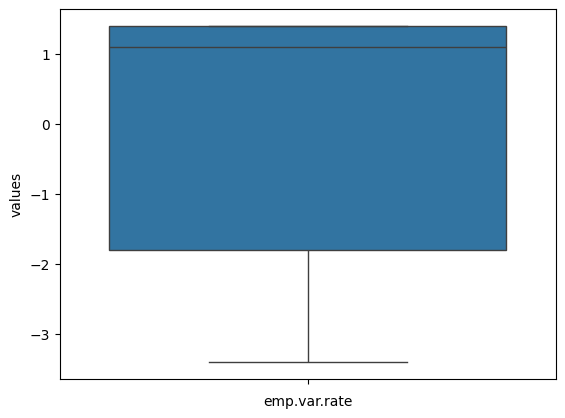

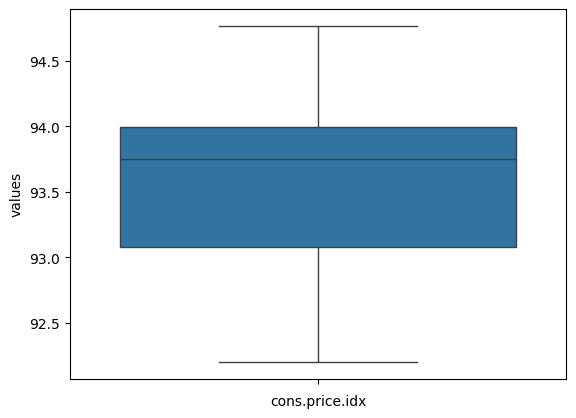

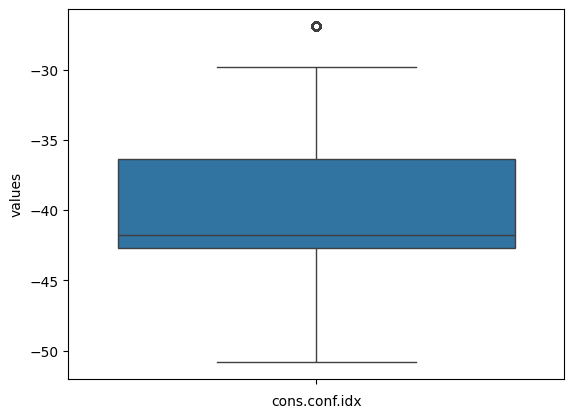

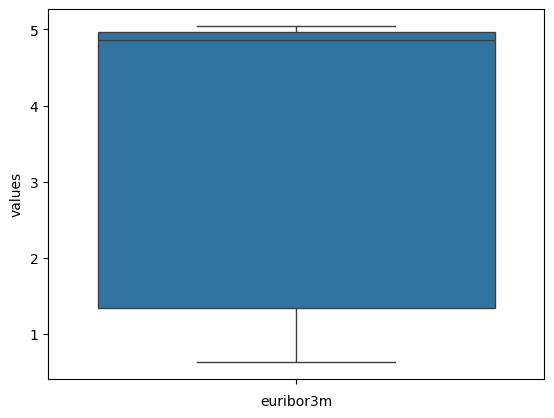

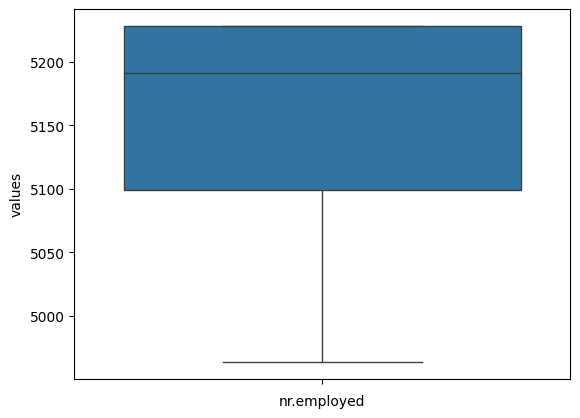

In [ ]:
for col_name in col:
  if (df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64'):
    sns.boxplot(df[col_name])
    plt.xlabel(col_name)
    plt.ylabel('values')
    plt.show()

From above boxplots: inferences:

Outliers in:
1. age
2. campaign
3. duration
4. cons.conf.idx

In [ ]:
#IQR method to remove outliers in above 4 columns: HW

col_list= ['age','campaign','duration','cons.conf.idx']

Q1= df.age.quantile(0.25)
Q3= df.age.quantile(0.75)
IQR = Q3-Q1
df = df[(df['age'] >= Q1 - (1.5*IQR)) & (df.age <=Q3 + (1.5*IQR))]

Q1= df.campaign.quantile(0.25)
Q3= df.campaign.quantile(0.75)
IQR = Q3-Q1
df = df[(df.campaign >= Q1 - (1.5*IQR)) & (df.campaign <=Q3 + (1.5*IQR))]

Q1= df.duration.quantile(0.25)
Q3= df.duration.quantile(0.75)
IQR = Q3-Q1
df = df[(df.duration >= Q1 - (1.5*IQR)) & (df.duration <=Q3 + (1.5*IQR))]

Q1= df['cons.conf.idx'].quantile(0.25)
Q3= df['cons.conf.idx'].quantile(0.75)
IQR = Q3-Q1
df = df[(df['cons.conf.idx'] >= Q1 - (1.5*IQR)) & (df['cons.conf.idx'] <=Q3 + (1.5*IQR))]


#df['age'] is same as df.age

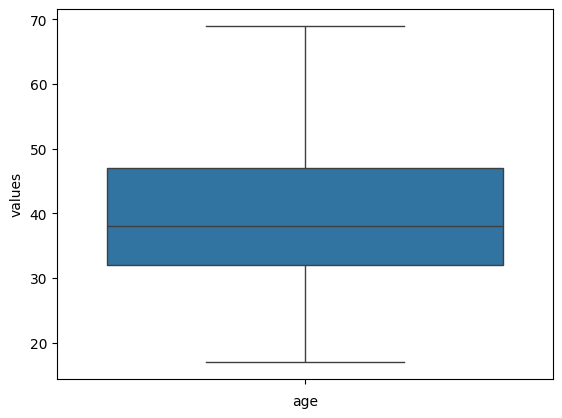

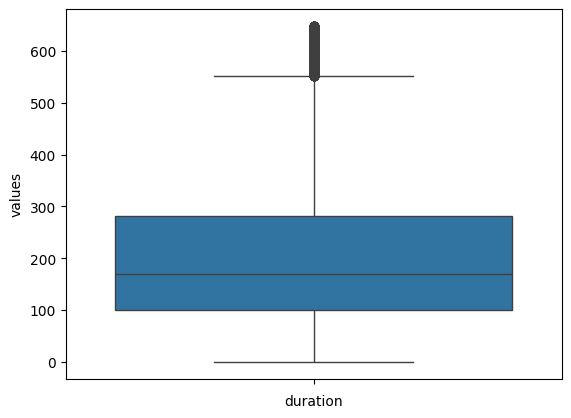

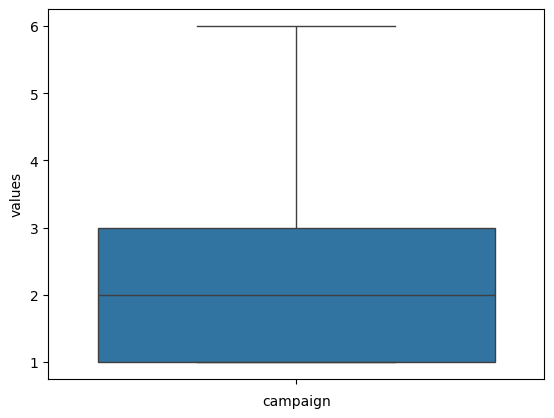

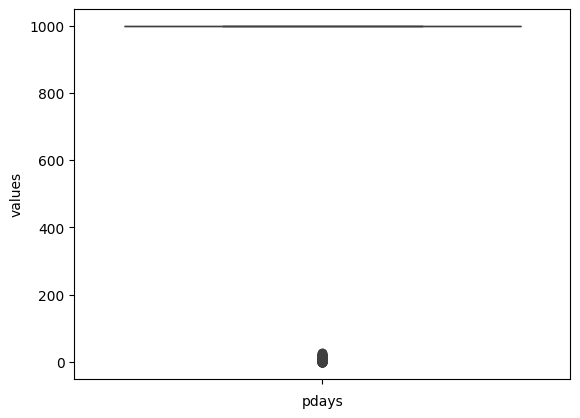

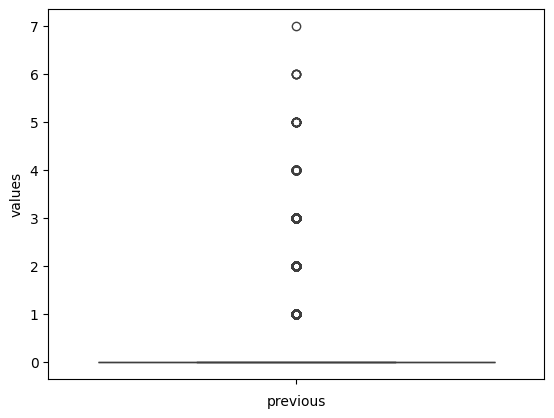

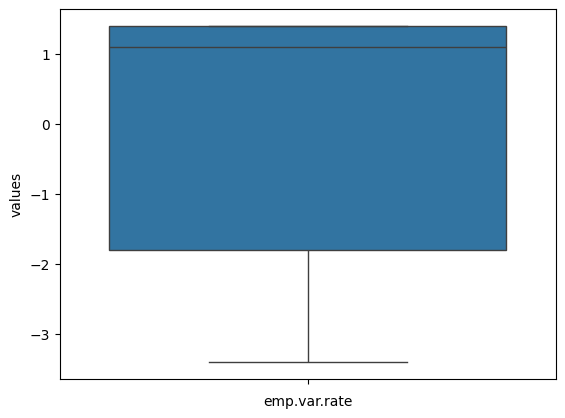

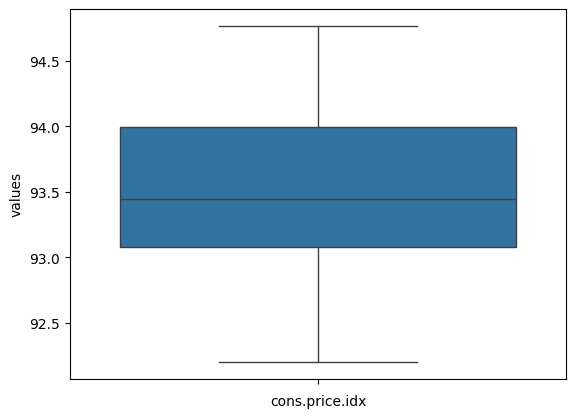

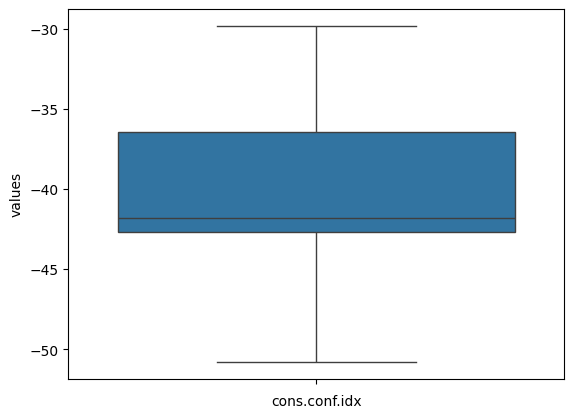

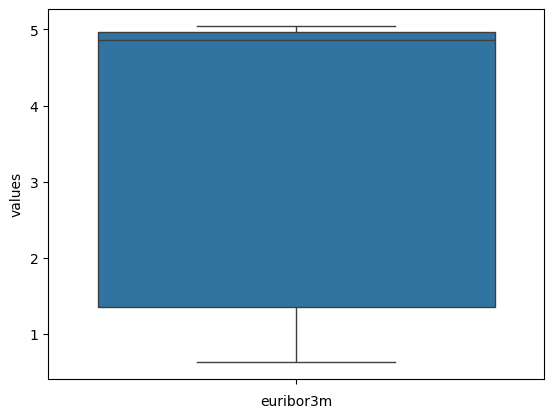

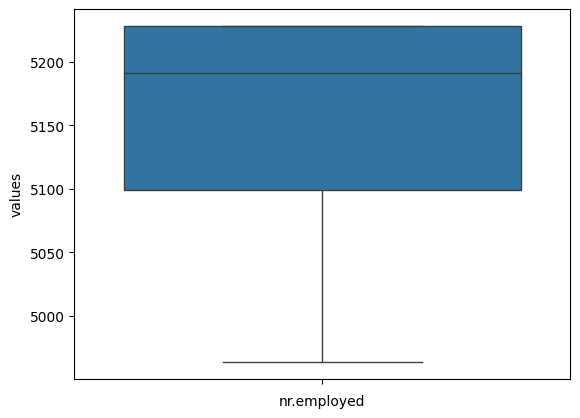

In [ ]:
for col_name in col:
  if (df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64'):
    sns.boxplot(df[col_name])
    plt.xlabel(col_name)
    plt.ylabel('values')
    plt.show()

In [ ]:
bins = [0,50,100]
df.age = pd.cut(df.age, bins)

In [ ]:
df.age

0        (50, 100]
1        (50, 100]
2          (0, 50]
3          (0, 50]
4        (50, 100]
           ...    
41181      (0, 50]
41182      (0, 50]
41184      (0, 50]
41185    (50, 100]
41186      (0, 50]
Name: age, Length: 35191, dtype: category
Categories (2, interval[int64, right]): [(0, 50] < (50, 100]]

In [ ]:
df.age = df.age.astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35191 entries, 0 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             35191 non-null  object 
 1   job             35191 non-null  object 
 2   marital         35191 non-null  object 
 3   education       35191 non-null  object 
 4   default         35191 non-null  object 
 5   housing         35191 non-null  object 
 6   loan            35191 non-null  object 
 7   contact         35191 non-null  object 
 8   month           35191 non-null  object 
 9   day_of_week     35191 non-null  object 
 10  duration        35191 non-null  float64
 11  campaign        35191 non-null  float64
 12  pdays           35191 non-null  float64
 13  previous        35191 non-null  float64
 14  poutcome        35191 non-null  object 
 15  emp.var.rate    35191 non-null  float64
 16  cons.price.idx  35191 non-null  float64
 17  cons.conf.idx   35191 non-null 

#Label Encoding:


In [ ]:
col_list=[]

for i in df.columns:
  if ((df[i].dtype == 'object') & (i != 'y')):
    col_list.append(i)

from sklearn.preprocessing import LabelEncoder

OBJ_Labelencode = LabelEncoder()
for i in col_list:
  df[i] = OBJ_Labelencode.fit_transform(df[i])

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,1,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,0,7,1,3,0,2,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,0,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,1,7,1,3,0,0,2,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,0,0,1,6,0,2,0,0,7,0,...,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,0,10,2,0,0,2,0,0,7,0,...,1.0,9.0,1.0,2,-1.1,94.767,-50.8,1.028,4963.6,no
41184,0,1,1,5,0,0,0,0,7,0,...,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6,no
41185,1,5,1,6,0,2,0,0,7,0,...,2.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6,no


In [ ]:
# VIF method : Variance Inflation Factor:

# used to measure multicollnearity among the independant variables(features) in models

# motive is to bring vif of all columns almost 5

#1. check vif
#2. drop too high vif values(50....)
#3. check vif
#4. if still more than 5 vif value is there---> remove that column
#5. check vif......

#once vif for all left columns is less than equal to 5 -> stop

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list=[]
for i in df.columns:
  if ((df[i].dtype != 'object') & (i!='y')):
    col_list.append(i)

#make dataset that stores all above columns data
df_v= df[col_list]

#made new dataframe to store columns names and vif values
vif_data_frame= pd.DataFrame()

#made 1st column to store column names
vif_data_frame['Feature']= df_v.columns

#made 2nd column to store vif value of each column
vif_data_frame['VIF']= [variance_inflation_factor(df_v.values, i) for i in range(len(df_v.columns))]

In [ ]:
vif_data_frame

,Feature,VIF
0,age,1.286116
1,job,2.102984
2,marital,5.103238
3,education,4.553317
4,default,1.388037
5,housing,2.212299
6,loan,1.208212
7,contact,2.945354
8,month,6.678209
9,day_of_week,3.098585


In [ ]:
df= df.drop(['nr.employed'], axis=1)

In [ ]:
df= df.drop(['cons.price.idx'], axis=1)

KeyError: "['cons.price.idx'] not found in axis"

In [ ]:
df= df.drop(['cons.conf.idx'], axis=1)

In [ ]:
df= df.drop(['euribor3m'], axis=1)


In [ ]:
df= df.drop(['pdays'], axis=1)

In [ ]:
#again check vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list=[]
for i in df.columns:
  if ((df[i].dtype != 'object') & (i!='y')):
    col_list.append(i)

#make dataset that stores all above columns data
df_v= df[col_list]

#made new dataframe to store columns names and vif values
vif_data_frame= pd.DataFrame()

#made 1st column to store column names
vif_data_frame['Feature']= df_v.columns

#made 2nd column to store vif value of each column
vif_data_frame['VIF']= [variance_inflation_factor(df_v.values, i) for i in range(len(df_v.columns))]

In [ ]:
vif_data_frame

,Feature,VIF
0,age,1.247909
1,job,2.059539
2,marital,4.490018
3,education,4.015036
4,default,1.344428
5,housing,2.114947
6,loan,1.200934
7,contact,2.241745
8,month,4.605692
9,day_of_week,2.891011


In [ ]:
df= df.drop(['poutcome'], axis=1)

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,y
0,1,3,1,0,0,0,0,1,6,1,261.0,1.0,0.0,1.1,no
1,1,7,1,3,1,0,0,1,6,1,149.0,1.0,0.0,1.1,no
2,0,7,1,3,0,2,0,1,6,1,226.0,1.0,0.0,1.1,no
3,0,0,1,1,0,0,0,1,6,1,151.0,1.0,0.0,1.1,no
4,1,7,1,3,0,0,2,1,6,1,307.0,1.0,0.0,1.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,0,0,1,6,0,2,0,0,7,0,281.0,1.0,0.0,-1.1,yes
41182,0,10,2,0,0,2,0,0,7,0,112.0,1.0,1.0,-1.1,no
41184,0,1,1,5,0,0,0,0,7,0,383.0,1.0,0.0,-1.1,no
41185,1,5,1,6,0,2,0,0,7,0,189.0,2.0,0.0,-1.1,no


#Model Building

In [ ]:
list_indepen= list(df.columns)
list_indepen.remove('y')

x= df[list_indepen]
y= df['y']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test , y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticmodel= LogisticRegression()

logisticmodel.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = logisticmodel.predict(x_test)


In [ ]:
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [ ]:
y_test

14934    no
14256    no
32744    no
9459     no
19910    no
         ..
17430    no
19953    no
6472     no
33738    no
9340     no
Name: y, Length: 10558, dtype: object

In [ ]:
from sklearn.metrics import accuracy_score

var_acc = accuracy_score(y_test, y_pred)

In [ ]:
var_acc

0.9292479636294753

My model is 92% accurate in predicting whether the person will get a loan or not


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[9655,  132],
       [ 615,  156]])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          no       0.94      0.99      0.96      9787
         yes       0.54      0.20      0.29       771

    accuracy                           0.93     10558
   macro avg       0.74      0.59      0.63     10558
weighted avg       0.91      0.93      0.91     10558

